In [10]:
import os

from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score

In [5]:
experiment_path = "output/dgcnn-hks"
val_predictions = os.path.join(experiment_path, "val_predictions_rot.csv")

## Emotions map

0. neutral
1. anger
2. contempt
3. disgust
4. fear
5. happy
6. sadness
7. surprise

## Validation data

              precision    recall  f1-score   support

           1       0.68      0.57      0.62        77
           2       0.36      0.24      0.29        17
           3       0.67      0.79      0.72        68
           4       0.68      0.82      0.75        50
           5       0.88      0.98      0.93       116
           6       0.49      0.39      0.43        51
           7       0.99      0.90      0.95       105

    accuracy                           0.77       484
   macro avg       0.68      0.67      0.67       484
weighted avg       0.76      0.77      0.76       484



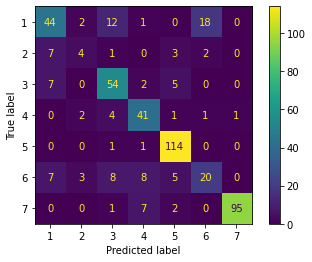

In [6]:
val_df = pd.read_csv(val_predictions)

print(classification_report(val_df["true"], val_df["predicted"]))
disp = ConfusionMatrixDisplay.from_predictions(val_df["true"], val_df["predicted"])

## Rotation invariance benchmark

In [ ]:
import pyvista as pv

mesh = pv.read()

In [18]:
models = ["dgcnn", "sage", "feast"]
features = ["xyz", "hks"]

data = []

for model in tqdm(models):
    for feature in tqdm(features):
        for rotation in tqdm([False, True]):
            val = pd.read_csv(f"output/{model}-{feature}{'-rot' if rotation else ''}/val_predictions.csv")
            val_rot = pd.read_csv(f"output/{model}-{feature}{'-rot' if rotation else ''}/val_predictions_rot.csv")

            val_f1 = f1_score(val["true"], val["predicted"], average="macro")
            val_f1_rot = f1_score(val_rot["true"], val_rot["predicted"], average="macro")

            data.append((model, feature, rotation, False, val_f1))
            data.append((model, feature, rotation, True, val_f1_rot))


df = pd.DataFrame(data, columns=["model", "features", "train-rot", "test-rot", "F1-macro"])
df[df["train-rot"] == False]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

,model,features,train-rot,test-rot,F1-macro
0,dgcnn,xyz,False,False,0.829445
1,dgcnn,xyz,False,True,0.072019
4,dgcnn,hks,False,False,0.716447
5,dgcnn,hks,False,True,0.728638
8,sage,xyz,False,False,0.759667
9,sage,xyz,False,True,0.063136
12,sage,hks,False,False,0.778652
13,sage,hks,False,True,0.719633
16,feast,xyz,False,False,0.763602
17,feast,xyz,False,True,0.136030
